Last tutorial on this page should be exactly whats needed

https://docs.fast.ai/tutorial.vision

In [1]:
from fastai.vision.all import *

In [2]:
path = Path('../')
labels_path = path/'download/labels/100_norm_imgs.csv'
# images_path = path/'download/images'

images_path = path/'download/norm_images'

df = pd.read_csv(labels_path, names=['name','x_p','y_p'], header=None)

In [5]:
df.head()

,name,x_p,y_p
NaN,name,x_p,y_p
0.0,0a0c1f65f19859c0.jpg,129.28,66.13333333333334
1.0,0a1dae8f71065201.jpg,116.90666666666665,99.31868294294607
2.0,0a1efc8533c96832.jpg,146.48,122.14850387883267
3.0,0a2ca221284ab461.jpg,100.38541666666666,68.65471642668234


In [6]:
img_files = get_image_files(images_path)

In [4]:
import re

def label_func(path_name):
    x = re.search(r'0\w+.jpg', str(path_name))
    return x.group()

def get_focus_point(x):
    file_name = label_func(x)
    dfb = next(iter(df[df['name']==file_name].index), ('no match '+file_name))
    return [float(df['x_p'][dfb]), float(df['y_p'][dfb])]

# get_focus_point(img_files[78])

In [24]:
path.ls

<bound method Path.ls of Path('..')>

(256, 256)


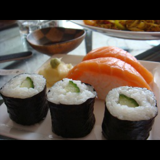

In [11]:
im = PILImage.create(img_files[5])
print(im.shape)
im.to_thumb(160)

In [5]:
imgs = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_focus_point,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    batch_tfms=[*aug_transforms(size=(256, 256)), 
                Normalize.from_stats(*imagenet_stats)],
    item_tfms=Resize(256),
)

In [6]:
dls = imgs.dataloaders(images_path)

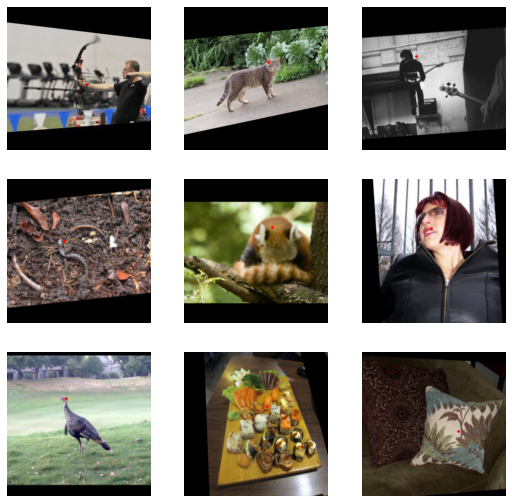

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1))

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=2.75422871709452e-06)

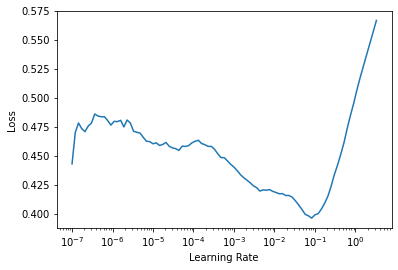

In [9]:
learn.lr_find()

In [12]:
learn.fine_tune(3, 8e-3) # see which values should be used

epoch,train_loss,valid_loss,time
0,0.408518,0.392648,00:13
1,0.404926,0.380705,00:12
2,0.436335,0.375661,00:12


In [49]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(6, nrows=3)

In [ ]:
learn.export('./models/80_imgs_test.pkl'))